In [4]:
%config Completer.use_jedi = False

import warnings
from fastcore.all import *

warnings.filterwarnings('ignore')

In [5]:
from duckduckgo_search import ddg_images

def search_images(term, max_images=30):
    print(f"searching for {term}")
    return L(ddg_images(term, max_results=max_images)).itemgot("image")

In [6]:
from fastdownload import download_url

download_url(search_images('car photo', max_images=1)[0], 'car.jpg', show_progress=False)
download_url(search_images('horse photo', max_images=1)[0], 'horse.jpg', show_progress=False)

searching for car photo
searching for horse photo


Path('horse.jpg')

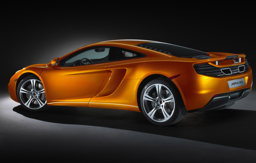

In [7]:
from fastai.vision.all import *

Image.open('car.jpg').to_thumb(256,256)

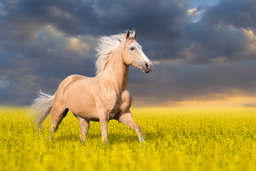

In [8]:
Image.open('horse.jpg').to_thumb(256,256)


In [9]:
from pathlib import Path
from time import sleep

searches = 'car', 'horse'
path = Path('car_and_horse')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)

    download_images(dest, urls=search_images(f'{o} sun photo', max_images=15))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo', max_images=15))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)
    

searching for car sun photo
searching for car shade photo
searching for horse sun photo
searching for horse shade photo


In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

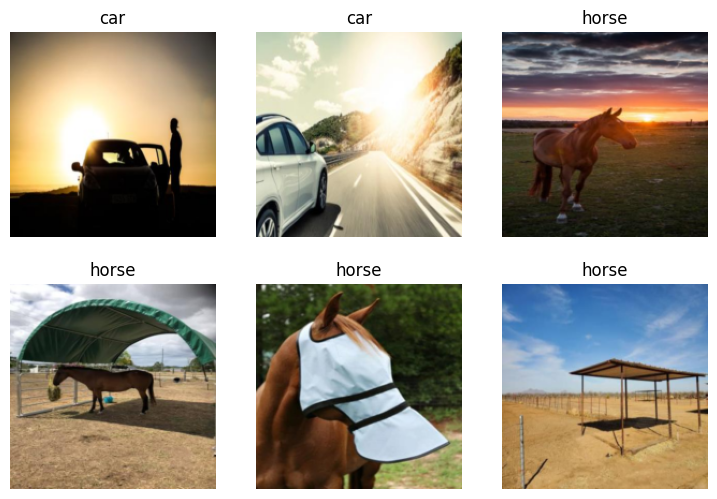

In [11]:
dls = DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


epoch,train_loss,valid_loss,error_rate,time
0,1.438023,0.662771,1.000000,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.297863,0.353330,1.000000,00:10
1,0.166873,0.302577,1.000000,00:04
2,0.122233,0.271272,1.000000,00:03


In [13]:
is_car,_,probs = learn.predict(PILImage.create('car.jpg'))
print(f"This is a: {is_car} with probability: {probs[0]:.04f}")

This is a: car with probability: 0.0000
